Analysis Complete. Pearson r: 0.2753


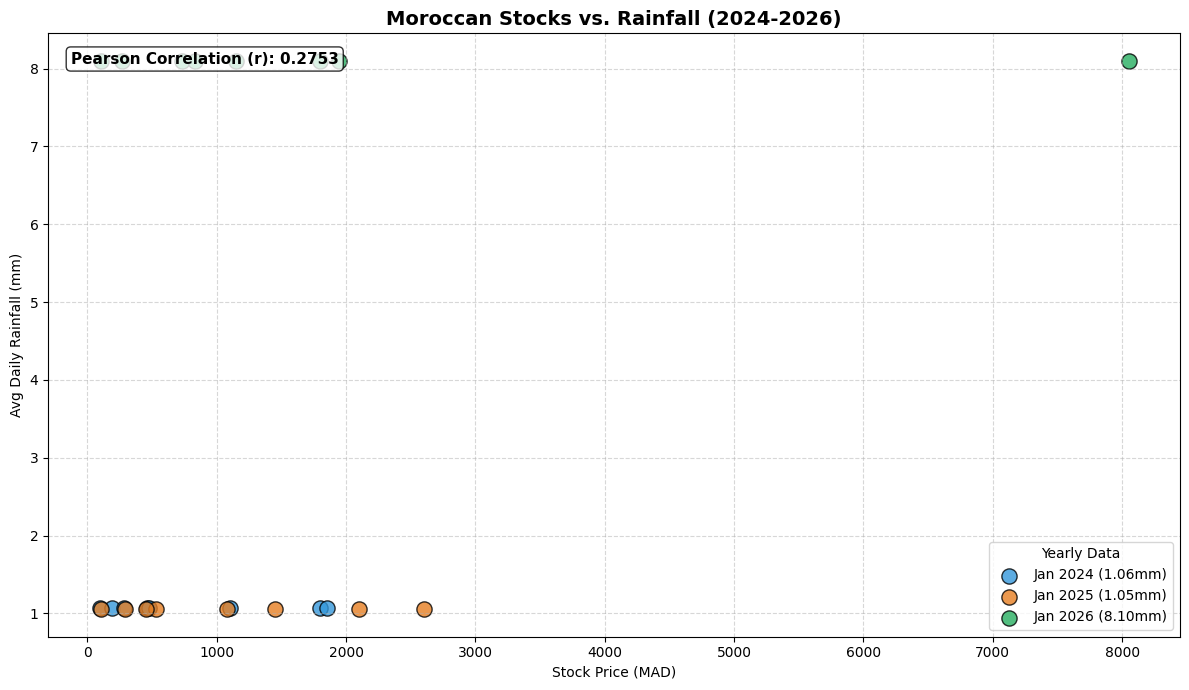

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# Step 1: Load Rainfall CSVs
# ---------------------------------------------------------
try:
    path = r"C:\Users\tgyh\Downloads\\"
    
    casa_2024 = pd.read_csv(path + "casa2024.csv", parse_dates=['date'])
    casa_2025 = pd.read_csv(path + "casa2025.csv", parse_dates=['date'])
    casa_2026 = pd.read_csv(path + "casa2026.csv", parse_dates=['date'])

    rabat_2024 = pd.read_csv(path + "rabat2024.csv", parse_dates=['date'])
    rabat_2025 = pd.read_csv(path + "rabat2025.csv", parse_dates=['date'])
    rabat_2026 = pd.read_csv(path + "rabat2026.csv", parse_dates=['date'])
except FileNotFoundError as e:
    print(f"Error: Could not find files. Check your path.\n{e}")
    exit()

# ---------------------------------------------------------
# Step 2: Average Rainfall (Syntax Fixed Here)
# ---------------------------------------------------------
def avg_rainfall(casa_df, rabat_df):
    # Added parentheses around suffixes
    merged = pd.merge(casa_df[['date','prcp']], rabat_df[['date','prcp']], 
                      on='date', suffixes=('_casa', '_rabat'))
    merged['avg_rain'] = merged[['prcp_casa','prcp_rabat']].mean(axis=1)
    return merged[['date','avg_rain']]

rain_2024 = avg_rainfall(casa_2024, rabat_2024)
rain_2025 = avg_rainfall(casa_2025, rabat_2025)
rain_2026 = avg_rainfall(casa_2026, rabat_2026)

# ---------------------------------------------------------
# Step 3: Compute Summary
# ---------------------------------------------------------
rain_summary = pd.DataFrame({
    'Year': [2024, 2025, 2026],
    'Avg_Rain_mm': [
        rain_2024[rain_2024['date'].dt.month == 1]['avg_rain'].mean(),
        rain_2025[rain_2025['date'].dt.month == 1]['avg_rain'].mean(),
        rain_2026[rain_2026['date'].dt.month == 1]['avg_rain'].mean()
    ],
    'Rainy_Days': [
        (rain_2024[rain_2024['date'].dt.month == 1]['avg_rain'] > 0).sum(),
        (rain_2025[rain_2025['date'].dt.month == 1]['avg_rain'] > 0).sum(),
        (rain_2026[rain_2026['date'].dt.month == 1]['avg_rain'] > 0).sum()
    ]
})

# ---------------------------------------------------------
# Step 4: Stock Data
# ---------------------------------------------------------
stock_data = {
    'Company': ['Attijariwafa Bank','Maroc Telecom','Managem','Akdital','TGCC','BCP','Taqa Morocco','LafargeHolcim'],
    'Jan 2024': [460, 95, 1800, 480, 190, 285, 1100, 1850],
    'Jan 2025': [530, 102, 2600, 1080, 450, 295, 1450, 2100],
    'Jan 2026': [731, 106, 8050, 1153, 834, 270, 1945, 1799]
}
stock_df = pd.DataFrame(stock_data)

# ---------------------------------------------------------
# Step 5: Correlation Calculation
# ---------------------------------------------------------
flattened_list = []
for year in [2024, 2025, 2026]:
    rain_val = rain_summary.loc[rain_summary['Year'] == year, 'Avg_Rain_mm'].values[0]
    prices = stock_df[f'Jan {year}'].values
    for p in prices:
        flattened_list.append({'Price': p, 'Rainfall': rain_val})

analysis_df = pd.DataFrame(flattened_list)
correlation_r = analysis_df['Price'].corr(analysis_df['Rainfall'])

# ---------------------------------------------------------
# Step 6: Visualization
# ---------------------------------------------------------
plt.figure(figsize=(12, 7))
colors = {2024: '#3498db', 2025: '#e67e22', 2026: '#27ae60'}

for year in [2024, 2025, 2026]:
    rain_val = rain_summary.loc[rain_summary['Year'] == year, 'Avg_Rain_mm'].values[0]
    plt.scatter(stock_df[f'Jan {year}'], [rain_val] * len(stock_df), 
                label=f'Jan {year} ({rain_val:.2f}mm)', 
                color=colors[year], s=120, alpha=0.8, edgecolors='black')

plt.title('Moroccan Stocks vs. Rainfall (2024-2026)', fontsize=14, fontweight='bold')
plt.xlabel('Stock Price (MAD)')
plt.ylabel('Avg Daily Rainfall (mm)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.text(0.02, 0.95, f'Pearson Correlation (r): {correlation_r:.4f}', 
         transform=plt.gca().transAxes, fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend(title="Yearly Data")
plt.tight_layout()

print(f"Analysis Complete. Pearson r: {correlation_r:.4f}")
plt.show()